In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from math import sqrt

pd.set_option('display.max_columns', None)

In [4]:
X_train = pd.read_csv('X_train.csv', index_col = 0)
X_train = X_train.reset_index(drop = True)
X_train = X_train[['item_price', 'numTracks', 'albumRelease', 'coded_country_code', 'coded_currency', 
                   'coded_genre', 'coded_tags', 'BC_friday','item_type_a', 'item_type_t', 'day_0', 'day_1', 'day_2', 'day_3',
                   'day_4', 'day_5','day_6', 'inAlbum_in', 'inAlbum_is', 'inAlbum_not']]

num_cols = ['item_price', 'numTracks', 'albumRelease']

for c in num_cols:
    X_train[c] = (X_train[c] - np.mean(X_train[c])) / np.std(X_train[c])
    
X_train.head()

,item_price,numTracks,albumRelease,coded_country_code,coded_currency,coded_genre,coded_tags,BC_friday,item_type_a,item_type_t,day_0,day_1,day_2,day_3,day_4,day_5,day_6,inAlbum_in,inAlbum_is,inAlbum_not
0,0.131991,0.279057,-0.379239,39,17,1,35,1,1,0,0,0,0,0,0,1,0,0,1,0
1,-0.720753,-0.568203,-0.379239,38,5,9,14,0,0,1,0,0,1,0,0,0,0,1,0,0
2,-0.278589,-0.568203,-0.379239,122,17,0,65,0,0,1,0,0,1,0,0,0,0,0,0,1
3,0.693199,0.173149,-0.379239,122,5,25,45,0,1,0,0,0,0,0,1,0,0,0,1,0
4,-0.764484,-0.568203,-0.379239,29,15,9,25,0,0,1,0,0,0,0,1,0,0,1,0,0


In [5]:
X_valid = pd.read_csv('X_valid.csv', index_col = 0)
X_valid = X_valid.reset_index(drop = True)
X_valid = X_valid[['item_price', 'numTracks', 'albumRelease', 'coded_country_code', 'coded_currency', 
                   'coded_genre', 'coded_tags', 'BC_friday','item_type_a', 'item_type_t', 'day_0', 'day_1', 'day_2', 'day_3',
                   'day_4', 'day_5','day_6', 'inAlbum_in', 'inAlbum_is', 'inAlbum_not']]

num_cols = ['item_price', 'numTracks', 'albumRelease']

for c in num_cols:
    X_valid[c] = (X_valid[c] - np.mean(X_valid[c])) / np.std(X_valid[c])
    
X_valid.head()

,item_price,numTracks,albumRelease,coded_country_code,coded_currency,coded_genre,coded_tags,BC_friday,item_type_a,item_type_t,day_0,day_1,day_2,day_3,day_4,day_5,day_6,inAlbum_in,inAlbum_is,inAlbum_not
0,-0.572836,-0.569851,-0.378710,122,5,17,17,0,0,1,0,0,1,0,0,0,0,1,0,0
1,-0.518914,-0.463141,-0.378710,39,6,10,60,0,1,0,0,0,0,0,1,0,0,0,1,0
2,1.196775,0.390539,-0.378710,109,17,24,65,0,1,0,0,1,0,0,0,0,0,0,1,0
3,0.461480,-0.143011,-0.378710,122,17,9,65,0,1,0,0,0,0,0,0,0,1,0,1,0
4,0.253146,-0.249721,0.527831,39,0,1,50,1,1,0,0,0,0,0,0,1,0,0,1,0


In [6]:
X_test = pd.read_csv('X_test.csv', index_col = 0)
X_test = X_test.reset_index(drop = True)
X_test = X_test[['item_price', 'numTracks', 'albumRelease', 'coded_country_code', 'coded_currency', 
                   'coded_genre', 'coded_tags', 'BC_friday','item_type_a', 'item_type_t', 'day_0', 'day_1', 'day_2', 'day_3',
                   'day_4', 'day_5','day_6', 'inAlbum_in', 'inAlbum_is', 'inAlbum_not']]

num_cols = ['item_price', 'numTracks', 'albumRelease']

for c in num_cols:
    X_test[c] = (X_test[c] - np.mean(X_test[c])) / np.std(X_test[c])
    
X_test.head()

,item_price,numTracks,albumRelease,coded_country_code,coded_currency,coded_genre,coded_tags,BC_friday,item_type_a,item_type_t,day_0,day_1,day_2,day_3,day_4,day_5,day_6,inAlbum_in,inAlbum_is,inAlbum_not
0,0.211198,-0.251585,-0.379414,77,6,18,32,0,1,0,0,0,0,0,0,1,0,0,1,0
1,-0.582668,-0.571906,-0.379414,122,5,9,24,0,0,1,0,0,1,0,0,0,0,1,0,0
2,-1.010134,-0.571906,0.510440,39,6,14,65,0,1,0,0,1,0,0,0,0,0,0,1,0
3,-0.460535,-0.571906,-0.379414,74,5,25,65,0,0,1,0,0,0,1,0,0,0,1,0,0
4,-1.010134,0.389058,-0.379414,4,17,27,65,0,1,0,0,1,0,0,0,0,0,0,1,0


In [7]:
y_train = pd.read_csv('y_train.csv', index_col = 0)
y_train = y_train.reset_index(drop = True)
y_train = y_train['amount_paid_usd']

y_valid = pd.read_csv('y_valid.csv', index_col = 0)
y_valid = y_valid.reset_index(drop = True)
y_valid = y_valid['amount_paid_usd']

y_test = pd.read_csv('y_test.csv', index_col = 0)
y_test = y_test.reset_index(drop = True)
y_test = y_test['amount_paid_usd']

In [8]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((398130, 20), (398130,), (132710, 20), (132710,), (132711, 20), (132711,))

In [9]:
train_country = X_train['coded_country_code']
train_currency = X_train['coded_currency']
train_genre = X_train['coded_genre']
train_tags = X_train['coded_tags']

X_train = X_train.drop(['coded_country_code', 'coded_currency', 'coded_genre', 'coded_tags'], axis = 1)

In [10]:
valid_country = X_valid['coded_country_code']
valid_currency = X_valid['coded_currency']
valid_genre = X_valid['coded_genre']
valid_tags = X_valid['coded_tags']

X_valid = X_valid.drop(['coded_country_code', 'coded_currency', 'coded_genre', 'coded_tags'], axis = 1)

In [11]:
test_country = X_test['coded_country_code']
test_currency = X_test['coded_currency']
test_genre = X_test['coded_genre']
test_tags = X_test['coded_tags']

X_test = X_test.drop(['coded_country_code', 'coded_currency', 'coded_genre', 'coded_tags'], axis = 1)

In [12]:
country_code = pd.read_csv('df_country.csv', index_col = 0)
country_input = len(country_code)

currency_code = pd.read_csv('df_currency.csv', index_col = 0)
currency_input = len(currency_code)

genre_code = pd.read_csv('df_genre.csv', index_col = 0)
genre_input = len(genre_code)

tags_code = pd.read_csv('df_tags.csv', index_col = 0)
tags_input = len(tags_code)

In [13]:
print(country_input, currency_input, genre_input, tags_input)

128 18 28 76


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow import keras
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

### Optimizer & Batch-size selection 

In [13]:
batches = [25, 50, 75, 100, 150, 200]
optimizers = ['adam', 'RMSprop']

In [14]:
def ee_nn(o, neurons, n_vec_country, n_vec_currency, n_vec_genre, n_vec_tags):
    #defining inputs
    country_input = keras.Input(shape = (1,), name = 'country')
    cur_input = keras.Input(shape = (1,), name = 'curs')
    genre_input = keras.Input(shape = (1,), name = 'genre')
    tags_input = keras.Input(shape = (1,), name = 'tags')
    num_input = keras.Input(shape = X_train.shape[1], name = 'num')
    
    #adding the embedding layers
    country_emb = keras.layers.Embedding(128, n_vec_country, name = 'country_emb')(country_input)
    currency_emb = keras.layers.Embedding(18, n_vec_currency, name = 'cur_emb')(cur_input)
    genres_emb = keras.layers.Embedding(28, n_vec_genre, name = 'genre_emb')(genre_input)
    tags_emb = keras.layers.Embedding(76, n_vec_tags, name = 'tags_emb')(tags_input)
    
    #flatten embedding layers
    flatten_country = keras.layers.Flatten()(country_emb)
    flatten_currs = keras.layers.Flatten()(currency_emb)
    flatten_genres = keras.layers.Flatten()(genres_emb)
    flatten_tags = keras.layers.Flatten()(tags_emb)
    
    #concatenate inputs
    layer = keras.layers.Concatenate()([flatten_country, flatten_currs, flatten_genres, flatten_tags, num_input])
    
    #adding Dense layers
    for n in neurons:
        layer = keras.layers.Dense(n, activation = keras.layers.LeakyReLU())(layer)
    
    layer_out = keras.layers.Dense(1, activation = 'linear')(layer)
    
    model = keras.Model(inputs = [country_input, cur_input, genre_input, tags_input, num_input], outputs = layer_out)
    model.compile(loss = 'mse', optimizer = o)
    return model

In [15]:
neurons = [32,16]

for b in batches:
    for o in optimizers:
        es = EarlyStopping(monitor = 'val_loss', mode='min', patience = 5, restore_best_weights = True)
        mod = ee_nn(o, neurons, 40, 15, 18, 30)
        print(mod.summary())
        mod.fit([train_country, train_currency, train_genre, train_tags, X_train], y_train, 
                batch_size = b, epochs = 100, validation_data = ([valid_country, valid_currency, valid_genre, valid_tags, X_valid], y_valid), callbacks=[es])
        pred = mod.predict([valid_country, valid_currency, valid_genre, valid_tags, X_valid])
        print('RMSE on valid data:', sqrt(mse(y_valid, pred)))
        keras.backend.clear_session()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 country (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 curs (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 genre (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                              

 flatten_1 (Flatten)            (None, 15)           0           ['cur_emb[0][0]']                
                                                                                                  
 flatten_2 (Flatten)            (None, 18)           0           ['genre_emb[0][0]']              
                                                                                                  
 flatten_3 (Flatten)            (None, 30)           0           ['tags_emb[0][0]']               
                                                                                                  
 num (InputLayer)               [(None, 16)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 119)          0           ['flatten[0][0]',                
                                                                  'flatten_1[0][0]',              
          

Epoch 5/100
7963/7963 [==============================] - 10s 1ms/step - loss: 15.6214 - val_loss: 14.0647
Epoch 6/100
7963/7963 [==============================] - 10s 1ms/step - loss: 15.6051 - val_loss: 14.0586
Epoch 7/100
7963/7963 [==============================] - 10s 1ms/step - loss: 15.5919 - val_loss: 14.1117
Epoch 8/100
7963/7963 [==============================] - 10s 1ms/step - loss: 15.5879 - val_loss: 14.0795
Epoch 9/100
7963/7963 [==============================] - 10s 1ms/step - loss: 15.5785 - val_loss: 14.0337
Epoch 10/100
7963/7963 [==============================] - 10s 1ms/step - loss: 15.5734 - val_loss: 14.0524
Epoch 11/100
7963/7963 [==============================] - 10s 1ms/step - loss: 15.5665 - val_loss: 14.1080
Epoch 12/100
7963/7963 [==============================] - 10s 1ms/step - loss: 15.5645 - val_loss: 14.0714
Epoch 13/100
7963/7963 [==============================] - 10s 1ms/step - loss: 15.5633 - val_loss: 14.0591
Epoch 14/100
4148/4148 [==================

 tags_emb (Embedding)           (None, 1, 30)        2280        ['tags[0][0]']                   
                                                                                                  
 flatten (Flatten)              (None, 40)           0           ['country_emb[0][0]']            
                                                                                                  
 flatten_1 (Flatten)            (None, 15)           0           ['cur_emb[0][0]']                
                                                                                                  
 flatten_2 (Flatten)            (None, 18)           0           ['genre_emb[0][0]']              
                                                                                                  
 flatten_3 (Flatten)            (None, 30)           0           ['tags_emb[0][0]']               
                                                                                                  
 num (Inpu

                                                                                                  
Total params: 12,559
Trainable params: 12,559
Non-trainable params: 0
__________________________________________________________________________________________________
None
Epoch 1/100
5309/5309 [==============================] - 7s 1ms/step - loss: 16.0894 - val_loss: 14.2202
Epoch 2/100
5309/5309 [==============================] - 7s 1ms/step - loss: 15.6917 - val_loss: 14.0945
Epoch 3/100
5309/5309 [==============================] - 7s 1ms/step - loss: 15.6708 - val_loss: 14.0850
Epoch 4/100
5309/5309 [==============================] - 6s 1ms/step - loss: 15.6543 - val_loss: 14.0953
Epoch 5/100
5309/5309 [==============================] - 7s 1ms/step - loss: 15.6434 - val_loss: 14.0989
Epoch 6/100
5309/5309 [==============================] - 6s 1ms/step - loss: 15.6383 - val_loss: 14.1316
Epoch 7/100
5309/5309 [==============================] - 7s 1ms/step - loss: 15.6375 - val_loss: 

 curs (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 genre (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 country_emb (Embedding)        (None, 1, 40)        5120        ['country[0][0]']                
                                                                                                  
 cur_emb (Embedding)            (None, 1, 15)        270         ['curs[0][0]']                   
                                                                                                  
 genre_emb

                                                                  'flatten_1[0][0]',              
                                                                  'flatten_2[0][0]',              
                                                                  'flatten_3[0][0]',              
                                                                  'num[0][0]']                    
                                                                                                  
 dense (Dense)                  (None, 32)           3840        ['concatenate[0][0]']            
                                                                                                  
 dense_1 (Dense)                (None, 16)           528         ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 1)            17          ['dense_1[0][0]']                
          

 cur_emb (Embedding)            (None, 1, 15)        270         ['curs[0][0]']                   
                                                                                                  
 genre_emb (Embedding)          (None, 1, 18)        504         ['genre[0][0]']                  
                                                                                                  
 tags_emb (Embedding)           (None, 1, 30)        2280        ['tags[0][0]']                   
                                                                                                  
 flatten (Flatten)              (None, 40)           0           ['country_emb[0][0]']            
                                                                                                  
 flatten_1 (Flatten)            (None, 15)           0           ['cur_emb[0][0]']                
                                                                                                  
 flatten_2

### Architecture

In [27]:
activations = ['relu', keras.layers.LeakyReLU(), 'linear']

In [28]:
architectures1 = [[32], [64], [128], [256], [512]]

In [29]:
def ee_nn(neurons, activations):
    #defining inputs
    country_input = keras.Input(shape = (1,), name = 'country')
    cur_input = keras.Input(shape = (1,), name = 'curs')
    genre_input = keras.Input(shape = (1,), name = 'genre')
    tags_input = keras.Input(shape = (1,), name = 'tags')
    num_input = keras.Input(shape = X_train.shape[1], name = 'num')
    
    #adding the embedding layers
    country_emb = keras.layers.Embedding(128, 40, name = 'country_emb')(country_input)
    currency_emb = keras.layers.Embedding(18, 15, name = 'cur_emb')(cur_input)
    genres_emb = keras.layers.Embedding(28, 18, name = 'genre_emb')(genre_input)
    tags_emb = keras.layers.Embedding(76, 30, name = 'tags_emb')(tags_input)
    
    #flatten embedding layers
    flatten_country = keras.layers.Flatten()(country_emb)
    flatten_currs = keras.layers.Flatten()(currency_emb)
    flatten_genres = keras.layers.Flatten()(genres_emb)
    flatten_tags = keras.layers.Flatten()(tags_emb)
    
    #concatenate inputs
    layer = keras.layers.Concatenate()([flatten_country, flatten_currs, flatten_genres, flatten_tags, num_input])
    
    #adding Dense layers
    for n in neurons:
        layer = keras.layers.Dense(n, activation = a)(layer)
    
    layer_out = keras.layers.Dense(1, activation = 'linear')(layer)
    
    model = keras.Model(inputs = [country_input, cur_input, genre_input, tags_input, num_input], outputs = layer_out)
    model.compile(loss = 'mse', optimizer = 'adam')
    return model

In [30]:
for ar in architectures1: 
    for a in activations:
        es = EarlyStopping(monitor = 'val_loss', mode='min', patience = 5, restore_best_weights = True)
        mod = ee_nn(ar, a)
        print(mod.summary())
        mod.fit([train_country, train_currency, train_genre, train_tags, X_train], y_train, 
                batch_size = 150, epochs = 100, validation_data = ([valid_country, valid_currency, valid_genre, valid_tags, X_valid], y_valid), callbacks=[es])
        pred = mod.predict([valid_country, valid_currency, valid_genre, valid_tags, X_valid])
        print('RMSE on valid data:', sqrt(mse(y_valid, pred)))
        keras.backend.clear_session()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 country (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 curs (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 genre (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                              

                                                                                                  
 num (InputLayer)               [(None, 16)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 119)          0           ['flatten[0][0]',                
                                                                  'flatten_1[0][0]',              
                                                                  'flatten_2[0][0]',              
                                                                  'flatten_3[0][0]',              
                                                                  'num[0][0]']                    
                                                                                                  
 dense (Dense)                  (None, 32)           3840        ['concatenate[0][0]']            
          

 flatten (Flatten)              (None, 40)           0           ['country_emb[0][0]']            
                                                                                                  
 flatten_1 (Flatten)            (None, 15)           0           ['cur_emb[0][0]']                
                                                                                                  
 flatten_2 (Flatten)            (None, 18)           0           ['genre_emb[0][0]']              
                                                                                                  
 flatten_3 (Flatten)            (None, 30)           0           ['tags_emb[0][0]']               
                                                                                                  
 num (InputLayer)               [(None, 16)]         0           []                               
                                                                                                  
 concatena

                                                                                                  
Total params: 15,919
Trainable params: 15,919
Non-trainable params: 0
__________________________________________________________________________________________________
None
Epoch 1/100
2655/2655 [==============================] - 5s 2ms/step - loss: 16.8465 - val_loss: 14.7180
Epoch 2/100
2655/2655 [==============================] - 4s 2ms/step - loss: 16.2001 - val_loss: 14.6384
Epoch 3/100
2655/2655 [==============================] - 4s 2ms/step - loss: 16.1963 - val_loss: 14.5952
Epoch 4/100
2655/2655 [==============================] - 4s 2ms/step - loss: 16.1937 - val_loss: 14.6239
Epoch 5/100
2655/2655 [==============================] - 4s 2ms/step - loss: 16.1919 - val_loss: 14.5940
Epoch 6/100
2655/2655 [==============================] - 4s 2ms/step - loss: 16.1903 - val_loss: 14.6243
Epoch 7/100
2655/2655 [==============================] - 4s 2ms/step - loss: 16.1883 - val_loss: 

 genre (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 country_emb (Embedding)        (None, 1, 40)        5120        ['country[0][0]']                
                                                                                                  
 cur_emb (Embedding)            (None, 1, 15)        270         ['curs[0][0]']                   
                                                                                                  
 genre_emb (Embedding)          (None, 1, 18)        504         ['genre[0][0]']                  
                                                                                                  
 tags_emb 

 dense (Dense)                  (None, 128)          15360       ['concatenate[0][0]']            
                                                                                                  
 dense_1 (Dense)                (None, 1)            129         ['dense[0][0]']                  
                                                                                                  
Total params: 23,663
Trainable params: 23,663
Non-trainable params: 0
__________________________________________________________________________________________________
None
Epoch 1/100
2655/2655 [==============================] - 5s 2ms/step - loss: 16.7260 - val_loss: 14.6182
Epoch 2/100
2655/2655 [==============================] - 5s 2ms/step - loss: 16.2094 - val_loss: 14.6049
Epoch 3/100
2655/2655 [==============================] - 5s 2ms/step - loss: 16.2015 - val_loss: 14.6199
Epoch 4/100
2655/2655 [==============================] - 5s 2ms/step - loss: 16.1986 - val_loss: 14.6085
Epoch 5/10

 curs (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 genre (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 country_emb (Embedding)        (None, 1, 40)        5120        ['country[0][0]']                
                                                                                                  
 cur_emb (Embedding)            (None, 1, 15)        270         ['curs[0][0]']                   
                                                                                                  
 genre_emb

                                                                  'num[0][0]']                    
                                                                                                  
 dense (Dense)                  (None, 256)          30720       ['concatenate[0][0]']            
                                                                                                  
 dense_1 (Dense)                (None, 1)            257         ['dense[0][0]']                  
                                                                                                  
Total params: 39,151
Trainable params: 39,151
Non-trainable params: 0
__________________________________________________________________________________________________
None
Epoch 1/100
2655/2655 [==============================] - 8s 3ms/step - loss: 16.5451 - val_loss: 14.6185
Epoch 2/100
2655/2655 [==============================] - 9s 3ms/step - loss: 16.2154 - val_loss: 14.6271
Epoch 3/100
2655/2655 

                                                                                                  
 curs (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 genre (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 country_emb (Embedding)        (None, 1, 40)        5120        ['country[0][0]']                
                                                                                                  
 cur_emb (Embedding)            (None, 1, 15)        270         ['curs[0][0]']                   
          

                                                                                                  
 flatten_1 (Flatten)            (None, 15)           0           ['cur_emb[0][0]']                
                                                                                                  
 flatten_2 (Flatten)            (None, 18)           0           ['genre_emb[0][0]']              
                                                                                                  
 flatten_3 (Flatten)            (None, 30)           0           ['tags_emb[0][0]']               
                                                                                                  
 num (InputLayer)               [(None, 16)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 119)          0           ['flatten[0][0]',                
          

In [31]:
architectures2 = [[32,16], [64,32], [128,64], [256,128], [512,256]]

In [32]:
for ar in architectures2: 
    for a in activations:
        es = EarlyStopping(monitor = 'val_loss', mode='min', patience = 5, restore_best_weights = True)
        mod = ee_nn(ar, a)
        print(mod.summary())
        mod.fit([train_country, train_currency, train_genre, train_tags, X_train], y_train, 
                batch_size = 150, epochs = 100, validation_data = ([valid_country, valid_currency, valid_genre, valid_tags, X_valid], y_valid), callbacks=[es])
        pred = mod.predict([valid_country, valid_currency, valid_genre, valid_tags, X_valid])
        print('RMSE on valid data:', sqrt(mse(y_valid, pred)))
        keras.backend.clear_session()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 country (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 curs (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 genre (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                              

 num (InputLayer)               [(None, 16)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 119)          0           ['flatten[0][0]',                
                                                                  'flatten_1[0][0]',              
                                                                  'flatten_2[0][0]',              
                                                                  'flatten_3[0][0]',              
                                                                  'num[0][0]']                    
                                                                                                  
 dense (Dense)                  (None, 32)           3840        ['concatenate[0][0]']            
                                                                                                  
 dense_1 (

Epoch 5/100
2655/2655 [==============================] - 3s 1ms/step - loss: 16.1920 - val_loss: 14.6112
Epoch 6/100
2655/2655 [==============================] - 4s 1ms/step - loss: 16.1955 - val_loss: 14.6058
Epoch 7/100
2655/2655 [==============================] - 4s 1ms/step - loss: 16.1955 - val_loss: 14.5947
Epoch 8/100
2655/2655 [==============================] - 3s 1ms/step - loss: 16.1938 - val_loss: 14.5921
Epoch 9/100
2655/2655 [==============================] - 3s 1ms/step - loss: 16.1911 - val_loss: 14.6038
Epoch 10/100
2655/2655 [==============================] - 4s 1ms/step - loss: 16.1894 - val_loss: 14.6066
Epoch 11/100
2655/2655 [==============================] - 4s 1ms/step - loss: 16.1856 - val_loss: 14.5853
Epoch 12/100
2655/2655 [==============================] - 4s 1ms/step - loss: 16.1881 - val_loss: 14.6049
Epoch 13/100
2655/2655 [==============================] - 3s 1ms/step - loss: 16.1860 - val_loss: 14.5960
Epoch 14/100
2655/2655 [===========================

 genre_emb (Embedding)          (None, 1, 18)        504         ['genre[0][0]']                  
                                                                                                  
 tags_emb (Embedding)           (None, 1, 30)        2280        ['tags[0][0]']                   
                                                                                                  
 flatten (Flatten)              (None, 40)           0           ['country_emb[0][0]']            
                                                                                                  
 flatten_1 (Flatten)            (None, 15)           0           ['cur_emb[0][0]']                
                                                                                                  
 flatten_2 (Flatten)            (None, 18)           0           ['genre_emb[0][0]']              
                                                                                                  
 flatten_3

Total params: 17,967
Trainable params: 17,967
Non-trainable params: 0
__________________________________________________________________________________________________
None
Epoch 1/100
2655/2655 [==============================] - 5s 2ms/step - loss: 16.5135 - val_loss: 14.6120
Epoch 2/100
2655/2655 [==============================] - 4s 2ms/step - loss: 16.2211 - val_loss: 14.6718
Epoch 3/100
2655/2655 [==============================] - 4s 2ms/step - loss: 16.2164 - val_loss: 14.6585
Epoch 4/100
2655/2655 [==============================] - 4s 1ms/step - loss: 16.2117 - val_loss: 14.6509
Epoch 5/100
2655/2655 [==============================] - 4s 2ms/step - loss: 16.2055 - val_loss: 14.6070
Epoch 6/100
2655/2655 [==============================] - 4s 2ms/step - loss: 16.2012 - val_loss: 14.5948
Epoch 7/100
2655/2655 [==============================] - 4s 2ms/step - loss: 16.1986 - val_loss: 14.5961
Epoch 8/100
2655/2655 [==============================] - 4s 1ms/step - loss: 16.2008 - val_

                                                                                                  
 country_emb (Embedding)        (None, 1, 40)        5120        ['country[0][0]']                
                                                                                                  
 cur_emb (Embedding)            (None, 1, 15)        270         ['curs[0][0]']                   
                                                                                                  
 genre_emb (Embedding)          (None, 1, 18)        504         ['genre[0][0]']                  
                                                                                                  
 tags_emb (Embedding)           (None, 1, 30)        2280        ['tags[0][0]']                   
                                                                                                  
 flatten (Flatten)              (None, 40)           0           ['country_emb[0][0]']            
          

 dense_1 (Dense)                (None, 64)           8256        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 1)            65          ['dense_1[0][0]']                
                                                                                                  
Total params: 31,855
Trainable params: 31,855
Non-trainable params: 0
__________________________________________________________________________________________________
None
Epoch 1/100
2655/2655 [==============================] - 7s 2ms/step - loss: 16.4342 - val_loss: 14.5915
Epoch 2/100
2655/2655 [==============================] - 6s 2ms/step - loss: 16.2477 - val_loss: 14.6645
Epoch 3/100
2655/2655 [==============================] - 6s 2ms/step - loss: 16.2330 - val_loss: 14.6029
Epoch 4/100
2655/2655 [==============================] - 6s 2ms/step - loss: 16.2182 - val_loss: 14.6126
Epoch 5/10

 country_emb (Embedding)        (None, 1, 40)        5120        ['country[0][0]']                
                                                                                                  
 cur_emb (Embedding)            (None, 1, 15)        270         ['curs[0][0]']                   
                                                                                                  
 genre_emb (Embedding)          (None, 1, 18)        504         ['genre[0][0]']                  
                                                                                                  
 tags_emb (Embedding)           (None, 1, 30)        2280        ['tags[0][0]']                   
                                                                                                  
 flatten (Flatten)              (None, 40)           0           ['country_emb[0][0]']            
                                                                                                  
 flatten_1

 dense_2 (Dense)                (None, 1)            129         ['dense_1[0][0]']                
                                                                                                  
Total params: 71,919
Trainable params: 71,919
Non-trainable params: 0
__________________________________________________________________________________________________
None
Epoch 1/100
2655/2655 [==============================] - 13s 5ms/step - loss: 16.3927 - val_loss: 14.6213
Epoch 2/100
2655/2655 [==============================] - 12s 4ms/step - loss: 16.2621 - val_loss: 14.6148
Epoch 3/100
2655/2655 [==============================] - 12s 4ms/step - loss: 16.2532 - val_loss: 14.8757
Epoch 4/100
2655/2655 [==============================] - 11s 4ms/step - loss: 16.2349 - val_loss: 14.6405
Epoch 5/100
2655/2655 [==============================] - 12s 4ms/step - loss: 16.2278 - val_loss: 14.6110
Epoch 6/100
2655/2655 [==============================] - 12s 4ms/step - loss: 16.2229 - val_loss: 

__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 country (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 curs (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 genre (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 country_e

                                                                                                  
 num (InputLayer)               [(None, 16)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 119)          0           ['flatten[0][0]',                
                                                                  'flatten_1[0][0]',              
                                                                  'flatten_2[0][0]',              
                                                                  'flatten_3[0][0]',              
                                                                  'num[0][0]']                    
                                                                                                  
 dense (Dense)                  (None, 512)          61440       ['concatenate[0][0]']            
          

In [33]:
architectures3 = [[32,16,4], [64,32,8], [128,64,16], [256,128,32], [512,256,64]]

In [34]:
for ar in architectures3: 
    for a in activations:
        es = EarlyStopping(monitor = 'val_loss', mode='min', patience = 5, restore_best_weights = True)
        mod = ee_nn(ar, a)
        print(mod.summary())
        mod.fit([train_country, train_currency, train_genre, train_tags, X_train], y_train, 
                batch_size = 150, epochs = 100, validation_data = ([valid_country, valid_currency, valid_genre, valid_tags, X_valid], y_valid), callbacks=[es])
        pred = mod.predict([valid_country, valid_currency, valid_genre, valid_tags, X_valid])
        print('RMSE on valid data:', sqrt(mse(y_valid, pred)))
        keras.backend.clear_session()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 country (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 curs (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 genre (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                              

                                                                                                  
 flatten_2 (Flatten)            (None, 18)           0           ['genre_emb[0][0]']              
                                                                                                  
 flatten_3 (Flatten)            (None, 30)           0           ['tags_emb[0][0]']               
                                                                                                  
 num (InputLayer)               [(None, 16)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 119)          0           ['flatten[0][0]',                
                                                                  'flatten_1[0][0]',              
                                                                  'flatten_2[0][0]',              
          

 dense (Dense)                  (None, 32)           3840        ['concatenate[0][0]']            
                                                                                                  
 dense_1 (Dense)                (None, 16)           528         ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 4)            68          ['dense_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 1)            5           ['dense_2[0][0]']                
                                                                                                  
Total params: 12,615
Trainable params: 12,615
Non-trainable params: 0
__________________________________________________________________________________________________
None
Epoch 1/100
2655/2655 [===========

                                                                                                  
 curs (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 genre (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 country_emb (Embedding)        (None, 1, 40)        5120        ['country[0][0]']                
                                                                                                  
 cur_emb (Embedding)            (None, 1, 15)        270         ['curs[0][0]']                   
          

                                                                                                  
 concatenate (Concatenate)      (None, 119)          0           ['flatten[0][0]',                
                                                                  'flatten_1[0][0]',              
                                                                  'flatten_2[0][0]',              
                                                                  'flatten_3[0][0]',              
                                                                  'num[0][0]']                    
                                                                                                  
 dense (Dense)                  (None, 64)           7680        ['concatenate[0][0]']            
                                                                                                  
 dense_1 (Dense)                (None, 32)           2080        ['dense[0][0]']                  
          

2655/2655 [==============================] - 7s 3ms/step - loss: 15.6206 - val_loss: 14.0259
Epoch 4/100
2655/2655 [==============================] - 7s 3ms/step - loss: 15.6027 - val_loss: 14.0710
Epoch 5/100
2655/2655 [==============================] - 7s 3ms/step - loss: 15.5788 - val_loss: 14.1420
Epoch 6/100
2655/2655 [==============================] - 8s 3ms/step - loss: 15.5525 - val_loss: 14.0615
Epoch 7/100
2655/2655 [==============================] - 7s 3ms/step - loss: 15.5308 - val_loss: 14.0527
Epoch 8/100
4148/4148 [==============================] - 3s 709us/step
RMSE on valid data: 3.7451157400334325
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 country (InputLayer)           [(None, 1)]          0           []                               
                                                                 

 flatten_1 (Flatten)            (None, 15)           0           ['cur_emb[0][0]']                
                                                                                                  
 flatten_2 (Flatten)            (None, 18)           0           ['genre_emb[0][0]']              
                                                                                                  
 flatten_3 (Flatten)            (None, 30)           0           ['tags_emb[0][0]']               
                                                                                                  
 num (InputLayer)               [(None, 16)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 119)          0           ['flatten[0][0]',                
                                                                  'flatten_1[0][0]',              
          

Total params: 75,951
Trainable params: 75,951
Non-trainable params: 0
__________________________________________________________________________________________________
None
Epoch 1/100
2655/2655 [==============================] - 17s 6ms/step - loss: 16.0147 - val_loss: 16.7536
Epoch 2/100
2655/2655 [==============================] - 16s 6ms/step - loss: 15.6728 - val_loss: 14.0663
Epoch 3/100
2655/2655 [==============================] - 16s 6ms/step - loss: 15.6386 - val_loss: 14.0933
Epoch 4/100
2655/2655 [==============================] - 16s 6ms/step - loss: 15.6148 - val_loss: 14.0347
Epoch 5/100
2655/2655 [==============================] - 16s 6ms/step - loss: 15.5848 - val_loss: 14.1286
Epoch 6/100
2655/2655 [==============================] - 16s 6ms/step - loss: 15.5682 - val_loss: 14.0618
Epoch 7/100
2655/2655 [==============================] - 16s 6ms/step - loss: 15.5350 - val_loss: 14.1366
Epoch 8/100
2655/2655 [==============================] - 16s 6ms/step - loss: 15.509

                                                                                                  
 genre (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 country_emb (Embedding)        (None, 1, 40)        5120        ['country[0][0]']                
                                                                                                  
 cur_emb (Embedding)            (None, 1, 15)        270         ['curs[0][0]']                   
                                                                                                  
 genre_emb (Embedding)          (None, 1, 18)        504         ['genre[0][0]']                  
          

 flatten_1 (Flatten)            (None, 15)           0           ['cur_emb[0][0]']                
                                                                                                  
 flatten_2 (Flatten)            (None, 18)           0           ['genre_emb[0][0]']              
                                                                                                  
 flatten_3 (Flatten)            (None, 30)           0           ['tags_emb[0][0]']               
                                                                                                  
 num (InputLayer)               [(None, 16)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 119)          0           ['flatten[0][0]',                
                                                                  'flatten_1[0][0]',              
          

Total params: 217,455
Trainable params: 217,455
Non-trainable params: 0
__________________________________________________________________________________________________
None
Epoch 1/100
2655/2655 [==============================] - 24s 9ms/step - loss: 15.9241 - val_loss: 14.1211
Epoch 2/100
2655/2655 [==============================] - 23s 9ms/step - loss: 15.7074 - val_loss: 14.0464
Epoch 3/100
2655/2655 [==============================] - 22s 8ms/step - loss: 15.6750 - val_loss: 14.1165
Epoch 4/100
2655/2655 [==============================] - 23s 9ms/step - loss: 15.6376 - val_loss: 14.2232
Epoch 5/100
2655/2655 [==============================] - 23s 9ms/step - loss: 15.6230 - val_loss: 14.0536
Epoch 6/100
2655/2655 [==============================] - 23s 9ms/step - loss: 15.6187 - val_loss: 14.0216
Epoch 7/100
2655/2655 [==============================] - 23s 9ms/step - loss: 15.6030 - val_loss: 14.0533
Epoch 8/100
2655/2655 [==============================] - 23s 8ms/step - loss: 15.5

In [35]:
architectures4 = [[32,16,4,2], [64,32,8,4], [128,64,16,8], [256,128,32,16], [512,256,64,32]]

In [36]:
for ar in architectures4: 
    for a in activations:
        es = EarlyStopping(monitor = 'val_loss', mode='min', patience = 5, restore_best_weights = True)
        mod = ee_nn(ar, a)
        print(mod.summary())
        mod.fit([train_country, train_currency, train_genre, train_tags, X_train], y_train, 
                batch_size = 150, epochs = 100, validation_data = ([valid_country, valid_currency, valid_genre, valid_tags, X_valid], y_valid), callbacks=[es])
        pred = mod.predict([valid_country, valid_currency, valid_genre, valid_tags, X_valid])
        print('RMSE on valid data:', sqrt(mse(y_valid, pred)))
        keras.backend.clear_session()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 country (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 curs (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 genre (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                              

 flatten_2 (Flatten)            (None, 18)           0           ['genre_emb[0][0]']              
                                                                                                  
 flatten_3 (Flatten)            (None, 30)           0           ['tags_emb[0][0]']               
                                                                                                  
 num (InputLayer)               [(None, 16)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 119)          0           ['flatten[0][0]',                
                                                                  'flatten_1[0][0]',              
                                                                  'flatten_2[0][0]',              
                                                                  'flatten_3[0][0]',              
          

                                                                                                  
 dense_2 (Dense)                (None, 4)            68          ['dense_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 2)            10          ['dense_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 1)            3           ['dense_3[0][0]']                
                                                                                                  
Total params: 12,623
Trainable params: 12,623
Non-trainable params: 0
__________________________________________________________________________________________________
None
Epoch 1/100
2655/2655 [==============================] - 5s 2ms/step - loss: 16.8217 - val_loss: 14.5832
Epoch 2/100
2655/2655 [=====

 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 country_emb (Embedding)        (None, 1, 40)        5120        ['country[0][0]']                
                                                                                                  
 cur_emb (Embedding)            (None, 1, 15)        270         ['curs[0][0]']                   
                                                                                                  
 genre_emb (Embedding)          (None, 1, 18)        504         ['genre[0][0]']                  
                                                                                                  
 tags_emb (Embedding)           (None, 1, 30)        2280        ['tags[0][0]']                   
                                                                                                  
 flatten (

                                                                                                  
 concatenate (Concatenate)      (None, 119)          0           ['flatten[0][0]',                
                                                                  'flatten_1[0][0]',              
                                                                  'flatten_2[0][0]',              
                                                                  'flatten_3[0][0]',              
                                                                  'num[0][0]']                    
                                                                                                  
 dense (Dense)                  (None, 64)           7680        ['concatenate[0][0]']            
                                                                                                  
 dense_1 (Dense)                (None, 32)           2080        ['dense[0][0]']                  
          

 cur_emb (Embedding)            (None, 1, 15)        270         ['curs[0][0]']                   
                                                                                                  
 genre_emb (Embedding)          (None, 1, 18)        504         ['genre[0][0]']                  
                                                                                                  
 tags_emb (Embedding)           (None, 1, 30)        2280        ['tags[0][0]']                   
                                                                                                  
 flatten (Flatten)              (None, 40)           0           ['country_emb[0][0]']            
                                                                                                  
 flatten_1 (Flatten)            (None, 15)           0           ['cur_emb[0][0]']                
                                                                                                  
 flatten_2

                                                                  'flatten_1[0][0]',              
                                                                  'flatten_2[0][0]',              
                                                                  'flatten_3[0][0]',              
                                                                  'num[0][0]']                    
                                                                                                  
 dense (Dense)                  (None, 256)          30720       ['concatenate[0][0]']            
                                                                                                  
 dense_1 (Dense)                (None, 128)          32896       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 32)           4128        ['dense_1[0][0]']                
          

2655/2655 [==============================] - 16s 6ms/step - loss: 15.6154 - val_loss: 14.0983
Epoch 6/100
2655/2655 [==============================] - 16s 6ms/step - loss: 15.6084 - val_loss: 14.0569
Epoch 7/100
2655/2655 [==============================] - 16s 6ms/step - loss: 15.5903 - val_loss: 14.2333
Epoch 8/100
2655/2655 [==============================] - 16s 6ms/step - loss: 15.5827 - val_loss: 14.0291
Epoch 9/100
2655/2655 [==============================] - 16s 6ms/step - loss: 15.5710 - val_loss: 14.0271
Epoch 10/100
2655/2655 [==============================] - 16s 6ms/step - loss: 15.5667 - val_loss: 14.0160
Epoch 11/100
2655/2655 [==============================] - 16s 6ms/step - loss: 15.5546 - val_loss: 14.0583
Epoch 12/100
2655/2655 [==============================] - 15s 6ms/step - loss: 15.5419 - val_loss: 14.0431
Epoch 13/100
2655/2655 [==============================] - 15s 6ms/step - loss: 15.5338 - val_loss: 14.0584
Epoch 14/100
2655/2655 [==============================

                                                                                                  
 curs (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 genre (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 country_emb (Embedding)        (None, 1, 40)        5120        ['country[0][0]']                
                                                                                                  
 cur_emb (Embedding)            (None, 1, 15)        270         ['curs[0][0]']                   
          

 num (InputLayer)               [(None, 16)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 119)          0           ['flatten[0][0]',                
                                                                  'flatten_1[0][0]',              
                                                                  'flatten_2[0][0]',              
                                                                  'flatten_3[0][0]',              
                                                                  'num[0][0]']                    
                                                                                                  
 dense (Dense)                  (None, 512)          61440       ['concatenate[0][0]']            
                                                                                                  
 dense_1 (

 dense_4 (Dense)                (None, 1)            33          ['dense_3[0][0]']                
                                                                                                  
Total params: 219,503
Trainable params: 219,503
Non-trainable params: 0
__________________________________________________________________________________________________
None
Epoch 1/100
2655/2655 [==============================] - 34s 12ms/step - loss: 16.4147 - val_loss: 14.7265
Epoch 2/100
2655/2655 [==============================] - 32s 12ms/step - loss: 16.2973 - val_loss: 14.7753
Epoch 3/100
2655/2655 [==============================] - 32s 12ms/step - loss: 16.2606 - val_loss: 14.6907
Epoch 4/100
2655/2655 [==============================] - 31s 12ms/step - loss: 16.2592 - val_loss: 14.6312
Epoch 5/100
2655/2655 [==============================] - 32s 12ms/step - loss: 16.2562 - val_loss: 14.8597
Epoch 6/100
2655/2655 [==============================] - 32s 12ms/step - loss: 16.2317 - va

###  Number of dimensions for each embedding layer

In [37]:
neurons = [128, 64, 16, 8]
countries_dims =  [20, 40, 60]
currency_dims =  [5, 10, 15]
genre_dims = [6, 12, 18]
tags_dims = [15, 30, 45]

In [38]:
def ee_nn(neurons, n_vec_country, n_vec_currency, n_vec_genre, n_vec_tags):
    #defining inputs
    country_input = keras.Input(shape = (1,), name = 'country')
    cur_input = keras.Input(shape = (1,), name = 'curs')
    genre_input = keras.Input(shape = (1,), name = 'genre')
    tags_input = keras.Input(shape = (1,), name = 'tags')
    num_input = keras.Input(shape = X_train.shape[1], name = 'num')
    
    #adding the embedding layers
    country_emb = keras.layers.Embedding(128, n_vec_country, name = 'country_emb')(country_input)
    currency_emb = keras.layers.Embedding(18, n_vec_currency, name = 'cur_emb')(cur_input)
    genres_emb = keras.layers.Embedding(28, n_vec_genre, name = 'genre_emb')(genre_input)
    tags_emb = keras.layers.Embedding(76, n_vec_tags, name = 'tags_emb')(tags_input)
    
    #flatten embedding layers
    flatten_country = keras.layers.Flatten()(country_emb)
    flatten_currs = keras.layers.Flatten()(currency_emb)
    flatten_genres = keras.layers.Flatten()(genres_emb)
    flatten_tags = keras.layers.Flatten()(tags_emb)
    
    #concatenate inputs
    layer = keras.layers.Concatenate()([flatten_country, flatten_currs, flatten_genres, flatten_tags, num_input])
    
    #adding Dense layers
    for n in neurons:
        layer = keras.layers.Dense(n, activation = keras.layers.LeakyReLU())(layer)
    
    layer_out = keras.layers.Dense(1, activation = 'linear')(layer)
    
    model = keras.Model(inputs = [country_input, cur_input, genre_input, tags_input, num_input], outputs = layer_out)
    model.compile(loss = 'mse', optimizer = 'adam')
    return model

In [40]:
for c in countries_dims:
    for cu in currency_dims:
        for g in genre_dims:
            for t in tags_dims:
                es = EarlyStopping(monitor = 'val_loss', mode='min', patience = 5, restore_best_weights = True)
                mod = ee_nn(neurons, c, cu, g, t)
                print(mod.summary())
                mod.fit([train_country, train_currency, train_genre, train_tags, X_train], y_train, 
                batch_size = 150, epochs = 100, validation_data = ([valid_country, valid_currency, valid_genre, valid_tags, X_valid], y_valid), callbacks=[es])
                pred = mod.predict([valid_country, valid_currency, valid_genre, valid_tags, X_valid])
                print('RMSE on valid data:', sqrt(mse(y_valid, pred)))
                keras.backend.clear_session()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 country (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 curs (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 genre (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                            

                                                                                                  
 num (InputLayer)               [(None, 16)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 77)           0           ['flatten[0][0]',                
                                                                  'flatten_1[0][0]',              
                                                                  'flatten_2[0][0]',              
                                                                  'flatten_3[0][0]',              
                                                                  'num[0][0]']                    
                                                                                                  
 dense (Dense)                  (None, 128)          9984        ['concatenate[0][0]']            
          

 genre_emb (Embedding)          (None, 1, 12)        336         ['genre[0][0]']                  
                                                                                                  
 tags_emb (Embedding)           (None, 1, 30)        2280        ['tags[0][0]']                   
                                                                                                  
 flatten (Flatten)              (None, 20)           0           ['country_emb[0][0]']            
                                                                                                  
 flatten_1 (Flatten)            (None, 5)            0           ['cur_emb[0][0]']                
                                                                                                  
 flatten_2 (Flatten)            (None, 12)           0           ['genre_emb[0][0]']              
                                                                                                  
 flatten_3

 dense_1 (Dense)                (None, 64)           8256        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 16)           1040        ['dense_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 8)            136         ['dense_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 1)            9           ['dense_3[0][0]']                
                                                                                                  
Total params: 28,519
Trainable params: 28,519
Non-trainable params: 0
__________________________________________________________________________________________________
None
Epoch 1/100
2655/2655 [===========

 tags_emb (Embedding)           (None, 1, 45)        3420        ['tags[0][0]']                   
                                                                                                  
 flatten (Flatten)              (None, 20)           0           ['country_emb[0][0]']            
                                                                                                  
 flatten_1 (Flatten)            (None, 5)            0           ['cur_emb[0][0]']                
                                                                                                  
 flatten_2 (Flatten)            (None, 18)           0           ['genre_emb[0][0]']              
                                                                                                  
 flatten_3 (Flatten)            (None, 45)           0           ['tags_emb[0][0]']               
                                                                                                  
 num (Inpu

                                                                                                  
 dense_2 (Dense)                (None, 16)           1040        ['dense_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 8)            136         ['dense_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 1)            9           ['dense_3[0][0]']                
                                                                                                  
Total params: 22,193
Trainable params: 22,193
Non-trainable params: 0
__________________________________________________________________________________________________
None
Epoch 1/100
2655/2655 [==============================] - 6s 2ms/step - loss: 16.0455 - val_loss: 14.0634
Epoch 2/100
2655/2655 [=====

 flatten_2 (Flatten)            (None, 12)           0           ['genre_emb[0][0]']              
                                                                                                  
 flatten_3 (Flatten)            (None, 15)           0           ['tags_emb[0][0]']               
                                                                                                  
 num (InputLayer)               [(None, 16)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 73)           0           ['flatten[0][0]',                
                                                                  'flatten_1[0][0]',              
                                                                  'flatten_2[0][0]',              
                                                                  'flatten_3[0][0]',              
          

None
Epoch 1/100
2655/2655 [==============================] - 6s 2ms/step - loss: 16.0872 - val_loss: 14.1052
Epoch 2/100
2655/2655 [==============================] - 5s 2ms/step - loss: 15.6719 - val_loss: 14.0949
Epoch 3/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.6333 - val_loss: 14.1993
Epoch 4/100
2655/2655 [==============================] - 5s 2ms/step - loss: 15.6160 - val_loss: 14.0462
Epoch 5/100
2655/2655 [==============================] - 5s 2ms/step - loss: 15.5974 - val_loss: 14.0335
Epoch 6/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.5881 - val_loss: 14.0426
Epoch 7/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.5761 - val_loss: 14.4614
Epoch 8/100
2655/2655 [==============================] - 5s 2ms/step - loss: 15.5691 - val_loss: 14.0223
Epoch 9/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.5571 - val_loss: 14.2300
Epoch 10/100
2655/2655 [==========================

 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 country_emb (Embedding)        (None, 1, 20)        2560        ['country[0][0]']                
                                                                                                  
 cur_emb (Embedding)            (None, 1, 10)        180         ['curs[0][0]']                   
                                                                                                  
 genre_emb (Embedding)          (None, 1, 18)        504         ['genre[0][0]']                  
                                                                                                  
 tags_emb (Embedding)           (None, 1, 15)        1140        ['tags[0][0]']                   
                                                                                                  
 flatten (

                                                                  'flatten_1[0][0]',              
                                                                  'flatten_2[0][0]',              
                                                                  'flatten_3[0][0]',              
                                                                  'num[0][0]']                    
                                                                                                  
 dense (Dense)                  (None, 128)          12160       ['concatenate[0][0]']            
                                                                                                  
 dense_1 (Dense)                (None, 64)           8256        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 16)           1040        ['dense_1[0][0]']                
          

None
Epoch 1/100
2655/2655 [==============================] - 7s 2ms/step - loss: 16.1418 - val_loss: 14.1618
Epoch 2/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.6775 - val_loss: 14.1525
Epoch 3/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.6414 - val_loss: 14.1592
Epoch 4/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.6257 - val_loss: 14.0508
Epoch 5/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.6190 - val_loss: 14.0273
Epoch 6/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.5979 - val_loss: 14.0491
Epoch 7/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.5909 - val_loss: 14.0638
Epoch 8/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.5761 - val_loss: 14.0929
Epoch 9/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.5652 - val_loss: 14.0714
Epoch 10/100
2655/2655 [==========================

                                                                                                  
 flatten (Flatten)              (None, 20)           0           ['country_emb[0][0]']            
                                                                                                  
 flatten_1 (Flatten)            (None, 15)           0           ['cur_emb[0][0]']                
                                                                                                  
 flatten_2 (Flatten)            (None, 6)            0           ['genre_emb[0][0]']              
                                                                                                  
 flatten_3 (Flatten)            (None, 45)           0           ['tags_emb[0][0]']               
                                                                                                  
 num (InputLayer)               [(None, 16)]         0           []                               
          

 dense_4 (Dense)                (None, 1)            9           ['dense_3[0][0]']                
                                                                                                  
Total params: 23,859
Trainable params: 23,859
Non-trainable params: 0
__________________________________________________________________________________________________
None
Epoch 1/100
2655/2655 [==============================] - 6s 2ms/step - loss: 16.1745 - val_loss: 14.1105
Epoch 2/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.6768 - val_loss: 14.2512
Epoch 3/100
2655/2655 [==============================] - 5s 2ms/step - loss: 15.6491 - val_loss: 14.0370
Epoch 4/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.6278 - val_loss: 14.0364
Epoch 5/100
2655/2655 [==============================] - 5s 2ms/step - loss: 15.6104 - val_loss: 14.0239
Epoch 6/100
2655/2655 [==============================] - 5s 2ms/step - loss: 15.5942 - val_loss: 14.021

 curs (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 genre (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 country_emb (Embedding)        (None, 1, 20)        2560        ['country[0][0]']                
                                                                                                  
 cur_emb (Embedding)            (None, 1, 15)        270         ['curs[0][0]']                   
                                                                                                  
 genre_emb

 concatenate (Concatenate)      (None, 84)           0           ['flatten[0][0]',                
                                                                  'flatten_1[0][0]',              
                                                                  'flatten_2[0][0]',              
                                                                  'flatten_3[0][0]',              
                                                                  'num[0][0]']                    
                                                                                                  
 dense (Dense)                  (None, 128)          10880       ['concatenate[0][0]']            
                                                                                                  
 dense_1 (Dense)                (None, 64)           8256        ['dense[0][0]']                  
                                                                                                  
 dense_2 (

                                                                                                  
 flatten (Flatten)              (None, 40)           0           ['country_emb[0][0]']            
                                                                                                  
 flatten_1 (Flatten)            (None, 5)            0           ['cur_emb[0][0]']                
                                                                                                  
 flatten_2 (Flatten)            (None, 6)            0           ['genre_emb[0][0]']              
                                                                                                  
 flatten_3 (Flatten)            (None, 15)           0           ['tags_emb[0][0]']               
                                                                                                  
 num (InputLayer)               [(None, 16)]         0           []                               
          

                                                                                                  
 dense_4 (Dense)                (None, 1)            9           ['dense_3[0][0]']                
                                                                                                  
Total params: 29,643
Trainable params: 29,643
Non-trainable params: 0
__________________________________________________________________________________________________
None
Epoch 1/100
2655/2655 [==============================] - 7s 2ms/step - loss: 16.0694 - val_loss: 14.1150
Epoch 2/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.6602 - val_loss: 14.0478
Epoch 3/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.6267 - val_loss: 14.0276
Epoch 4/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.6119 - val_loss: 14.0441
Epoch 5/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.6022 - val_loss: 14.1226
Epoc

                                                                                                  
 genre (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 country_emb (Embedding)        (None, 1, 40)        5120        ['country[0][0]']                
                                                                                                  
 cur_emb (Embedding)            (None, 1, 5)         90          ['curs[0][0]']                   
                                                                                                  
 genre_emb (Embedding)          (None, 1, 12)        336         ['genre[0][0]']                  
          

 concatenate (Concatenate)      (None, 103)          0           ['flatten[0][0]',                
                                                                  'flatten_1[0][0]',              
                                                                  'flatten_2[0][0]',              
                                                                  'flatten_3[0][0]',              
                                                                  'num[0][0]']                    
                                                                                                  
 dense (Dense)                  (None, 128)          13312       ['concatenate[0][0]']            
                                                                                                  
 dense_1 (Dense)                (None, 64)           8256        ['dense[0][0]']                  
                                                                                                  
 dense_2 (

                                                                                                  
 genre (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 country_emb (Embedding)        (None, 1, 40)        5120        ['country[0][0]']                
                                                                                                  
 cur_emb (Embedding)            (None, 1, 5)         90          ['curs[0][0]']                   
                                                                                                  
 genre_emb (Embedding)          (None, 1, 18)        504         ['genre[0][0]']                  
          

                                                                  'flatten_1[0][0]',              
                                                                  'flatten_2[0][0]',              
                                                                  'flatten_3[0][0]',              
                                                                  'num[0][0]']                    
                                                                                                  
 dense (Dense)                  (None, 128)          16000       ['concatenate[0][0]']            
                                                                                                  
 dense_1 (Dense)                (None, 64)           8256        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 16)           1040        ['dense_1[0][0]']                
          

 flatten_1 (Flatten)            (None, 10)           0           ['cur_emb[0][0]']                
                                                                                                  
 flatten_2 (Flatten)            (None, 6)            0           ['genre_emb[0][0]']              
                                                                                                  
 flatten_3 (Flatten)            (None, 45)           0           ['tags_emb[0][0]']               
                                                                                                  
 num (InputLayer)               [(None, 16)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 117)          0           ['flatten[0][0]',                
                                                                  'flatten_1[0][0]',              
          

Total params: 28,249
Trainable params: 28,249
Non-trainable params: 0
__________________________________________________________________________________________________
None
Epoch 1/100
2655/2655 [==============================] - 7s 2ms/step - loss: 16.2033 - val_loss: 14.4121
Epoch 2/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.6843 - val_loss: 14.0507
Epoch 3/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.6485 - val_loss: 14.0412
Epoch 4/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.6186 - val_loss: 14.0501
Epoch 5/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.6155 - val_loss: 14.1904
Epoch 6/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.5994 - val_loss: 14.0197
Epoch 7/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.5835 - val_loss: 14.1066
Epoch 8/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.5704 - val_

                                                                                                  
 cur_emb (Embedding)            (None, 1, 10)        180         ['curs[0][0]']                   
                                                                                                  
 genre_emb (Embedding)          (None, 1, 12)        336         ['genre[0][0]']                  
                                                                                                  
 tags_emb (Embedding)           (None, 1, 45)        3420        ['tags[0][0]']                   
                                                                                                  
 flatten (Flatten)              (None, 40)           0           ['country_emb[0][0]']            
                                                                                                  
 flatten_1 (Flatten)            (None, 10)           0           ['cur_emb[0][0]']                
          

                                                                  'flatten_1[0][0]',              
                                                                  'flatten_2[0][0]',              
                                                                  'flatten_3[0][0]',              
                                                                  'num[0][0]']                    
                                                                                                  
 dense (Dense)                  (None, 128)          12800       ['concatenate[0][0]']            
                                                                                                  
 dense_1 (Dense)                (None, 64)           8256        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 16)           1040        ['dense_1[0][0]']                
          

                                                                                                  
 flatten_2 (Flatten)            (None, 6)            0           ['genre_emb[0][0]']              
                                                                                                  
 flatten_3 (Flatten)            (None, 15)           0           ['tags_emb[0][0]']               
                                                                                                  
 num (InputLayer)               [(None, 16)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 92)           0           ['flatten[0][0]',                
                                                                  'flatten_1[0][0]',              
                                                                  'flatten_2[0][0]',              
          

Total params: 31,103
Trainable params: 31,103
Non-trainable params: 0
__________________________________________________________________________________________________
None
Epoch 1/100
2655/2655 [==============================] - 8s 3ms/step - loss: 16.0605 - val_loss: 14.0572
Epoch 2/100
2655/2655 [==============================] - 7s 3ms/step - loss: 15.6612 - val_loss: 14.0582
Epoch 3/100
2655/2655 [==============================] - 7s 3ms/step - loss: 15.6415 - val_loss: 14.0506
Epoch 4/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.6207 - val_loss: 14.1606
Epoch 5/100
2655/2655 [==============================] - 7s 3ms/step - loss: 15.6048 - val_loss: 14.0901
Epoch 6/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.5931 - val_loss: 14.0679
Epoch 7/100
2655/2655 [==============================] - 7s 3ms/step - loss: 15.5865 - val_loss: 14.0296
Epoch 8/100
2655/2655 [==============================] - 7s 3ms/step - loss: 15.5669 - val_

 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 country_emb (Embedding)        (None, 1, 40)        5120        ['country[0][0]']                
                                                                                                  
 cur_emb (Embedding)            (None, 1, 15)        270         ['curs[0][0]']                   
                                                                                                  
 genre_emb (Embedding)          (None, 1, 12)        336         ['genre[0][0]']                  
                                                                                                  
 tags_emb (Embedding)           (None, 1, 15)        1140        ['tags[0][0]']                   
                                                                                                  
 flatten (

                                                                                                  
 dense (Dense)                  (None, 128)          14592       ['concatenate[0][0]']            
                                                                                                  
 dense_1 (Dense)                (None, 64)           8256        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 16)           1040        ['dense_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 8)            136         ['dense_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 1)            9           ['dense_3[0][0]']                
          

Epoch 7/100
2655/2655 [==============================] - 7s 3ms/step - loss: 15.5950 - val_loss: 14.0488
Epoch 8/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.5880 - val_loss: 14.0810
Epoch 9/100
2655/2655 [==============================] - 8s 3ms/step - loss: 15.5865 - val_loss: 14.0200
Epoch 10/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.5726 - val_loss: 14.1152
Epoch 11/100
2655/2655 [==============================] - 7s 3ms/step - loss: 15.5642 - val_loss: 14.1040
Epoch 12/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.5539 - val_loss: 14.0507
Epoch 13/100
2655/2655 [==============================] - 6s 2ms/step - loss: 15.5554 - val_loss: 14.0632
Epoch 14/100
4148/4148 [==============================] - 3s 698us/step
RMSE on valid data: 3.744331134123639
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Outpu

                                                                                                  
 tags_emb (Embedding)           (None, 1, 30)        2280        ['tags[0][0]']                   
                                                                                                  
 flatten (Flatten)              (None, 40)           0           ['country_emb[0][0]']            
                                                                                                  
 flatten_1 (Flatten)            (None, 15)           0           ['cur_emb[0][0]']                
                                                                                                  
 flatten_2 (Flatten)            (None, 18)           0           ['genre_emb[0][0]']              
                                                                                                  
 flatten_3 (Flatten)            (None, 30)           0           ['tags_emb[0][0]']               
          

                                                                                                  
 dense_4 (Dense)                (None, 1)            9           ['dense_3[0][0]']                
                                                                                                  
Total params: 36,035
Trainable params: 36,035
Non-trainable params: 0
__________________________________________________________________________________________________
None
Epoch 1/100
2655/2655 [==============================] - 8s 3ms/step - loss: 16.1304 - val_loss: 14.1015
Epoch 2/100
2655/2655 [==============================] - 7s 3ms/step - loss: 15.6862 - val_loss: 14.0793
Epoch 3/100
2655/2655 [==============================] - 7s 3ms/step - loss: 15.6499 - val_loss: 14.0401
Epoch 4/100
2655/2655 [==============================] - 7s 3ms/step - loss: 15.6258 - val_loss: 14.5050
Epoch 5/100
2655/2655 [==============================] - 7s 3ms/step - loss: 15.6210 - val_loss: 14.1963
Epoc

 country (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 curs (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 genre (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 country_emb (Embedding)        (None, 1, 60)        7680        ['country[0][0]']                
                                                                                                  
 cur_emb (

                                                                                                  
 concatenate (Concatenate)      (None, 132)          0           ['flatten[0][0]',                
                                                                  'flatten_1[0][0]',              
                                                                  'flatten_2[0][0]',              
                                                                  'flatten_3[0][0]',              
                                                                  'num[0][0]']                    
                                                                                                  
 dense (Dense)                  (None, 128)          17024       ['concatenate[0][0]']            
                                                                                                  
 dense_1 (Dense)                (None, 64)           8256        ['dense[0][0]']                  
          

                                                                                                  
 genre (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 country_emb (Embedding)        (None, 1, 60)        7680        ['country[0][0]']                
                                                                                                  
 cur_emb (Embedding)            (None, 1, 5)         90          ['curs[0][0]']                   
                                                                                                  
 genre_emb (Embedding)          (None, 1, 12)        336         ['genre[0][0]']                  
          

 concatenate (Concatenate)      (None, 114)          0           ['flatten[0][0]',                
                                                                  'flatten_1[0][0]',              
                                                                  'flatten_2[0][0]',              
                                                                  'flatten_3[0][0]',              
                                                                  'num[0][0]']                    
                                                                                                  
 dense (Dense)                  (None, 128)          14720       ['concatenate[0][0]']            
                                                                                                  
 dense_1 (Dense)                (None, 64)           8256        ['dense[0][0]']                  
                                                                                                  
 dense_2 (

                                                                                                  
 country_emb (Embedding)        (None, 1, 60)        7680        ['country[0][0]']                
                                                                                                  
 cur_emb (Embedding)            (None, 1, 10)        180         ['curs[0][0]']                   
                                                                                                  
 genre_emb (Embedding)          (None, 1, 6)         168         ['genre[0][0]']                  
                                                                                                  
 tags_emb (Embedding)           (None, 1, 15)        1140        ['tags[0][0]']                   
                                                                                                  
 flatten (Flatten)              (None, 60)           0           ['country_emb[0][0]']            
          

                                                                                                  
 num (InputLayer)               [(None, 16)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 122)          0           ['flatten[0][0]',                
                                                                  'flatten_1[0][0]',              
                                                                  'flatten_2[0][0]',              
                                                                  'flatten_3[0][0]',              
                                                                  'num[0][0]']                    
                                                                                                  
 dense (Dense)                  (None, 128)          15744       ['concatenate[0][0]']            
          

                                                                                                  
 dense_4 (Dense)                (None, 1)            9           ['dense_3[0][0]']                
                                                                                                  
Total params: 38,553
Trainable params: 38,553
Non-trainable params: 0
__________________________________________________________________________________________________
None
Epoch 1/100
2655/2655 [==============================] - 8s 3ms/step - loss: 16.0542 - val_loss: 14.0372
Epoch 2/100
2655/2655 [==============================] - 7s 3ms/step - loss: 15.6691 - val_loss: 14.0726
Epoch 3/100
2655/2655 [==============================] - 7s 3ms/step - loss: 15.6444 - val_loss: 14.2342
Epoch 4/100
2655/2655 [==============================] - 7s 3ms/step - loss: 15.6170 - val_loss: 14.0455
Epoch 5/100
2655/2655 [==============================] - 7s 3ms/step - loss: 15.5986 - val_loss: 14.2637
Epoc

 country (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 curs (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 genre (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 country_emb (Embedding)        (None, 1, 60)        7680        ['country[0][0]']                
                                                                                                  
 cur_emb (

 flatten_3 (Flatten)            (None, 45)           0           ['tags_emb[0][0]']               
                                                                                                  
 num (InputLayer)               [(None, 16)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 143)          0           ['flatten[0][0]',                
                                                                  'flatten_1[0][0]',              
                                                                  'flatten_2[0][0]',              
                                                                  'flatten_3[0][0]',              
                                                                  'num[0][0]']                    
                                                                                                  
 dense (De

                                                                                                  
 country_emb (Embedding)        (None, 1, 60)        7680        ['country[0][0]']                
                                                                                                  
 cur_emb (Embedding)            (None, 1, 10)        180         ['curs[0][0]']                   
                                                                                                  
 genre_emb (Embedding)          (None, 1, 18)        504         ['genre[0][0]']                  
                                                                                                  
 tags_emb (Embedding)           (None, 1, 45)        3420        ['tags[0][0]']                   
                                                                                                  
 flatten (Flatten)              (None, 60)           0           ['country_emb[0][0]']            
          

 dense (Dense)                  (None, 128)          14464       ['concatenate[0][0]']            
                                                                                                  
 dense_1 (Dense)                (None, 64)           8256        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 16)           1040        ['dense_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 8)            136         ['dense_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 1)            9           ['dense_3[0][0]']                
                                                                                                  
Total para

Epoch 13/100
2655/2655 [==============================] - 7s 3ms/step - loss: 15.5331 - val_loss: 14.0273
Epoch 14/100
2655/2655 [==============================] - 7s 3ms/step - loss: 15.5292 - val_loss: 14.0758
Epoch 15/100
2655/2655 [==============================] - 7s 3ms/step - loss: 15.5112 - val_loss: 14.0374
Epoch 16/100
2655/2655 [==============================] - 7s 3ms/step - loss: 15.5111 - val_loss: 14.0435
Epoch 17/100
2655/2655 [==============================] - 7s 2ms/step - loss: 15.4929 - val_loss: 14.1175
Epoch 18/100
4148/4148 [==============================] - 3s 707us/step
RMSE on valid data: 3.745297820383277
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 country (InputLayer)           [(None, 1)]          0           []                               
                                                

                                                                                                  
 tags_emb (Embedding)           (None, 1, 15)        1140        ['tags[0][0]']                   
                                                                                                  
 flatten (Flatten)              (None, 60)           0           ['country_emb[0][0]']            
                                                                                                  
 flatten_1 (Flatten)            (None, 15)           0           ['cur_emb[0][0]']                
                                                                                                  
 flatten_2 (Flatten)            (None, 12)           0           ['genre_emb[0][0]']              
                                                                                                  
 flatten_3 (Flatten)            (None, 15)           0           ['tags_emb[0][0]']               
          

                                                                  'flatten_3[0][0]',              
                                                                  'num[0][0]']                    
                                                                                                  
 dense (Dense)                  (None, 128)          17152       ['concatenate[0][0]']            
                                                                                                  
 dense_1 (Dense)                (None, 64)           8256        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 16)           1040        ['dense_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 8)            136         ['dense_2[0][0]']                
          

__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 country (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 curs (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 genre (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 country_e

 flatten_3 (Flatten)            (None, 30)           0           ['tags_emb[0][0]']               
                                                                                                  
 num (InputLayer)               [(None, 16)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 139)          0           ['flatten[0][0]',                
                                                                  'flatten_1[0][0]',              
                                                                  'flatten_2[0][0]',              
                                                                  'flatten_3[0][0]',              
                                                                  'num[0][0]']                    
                                                                                                  
 dense (De

## Retrain on train + valid data and evaluate on test data

In [15]:
#retrain network
X_train2 = pd.concat([X_train, X_valid])
y_train2 = pd.concat([y_train, y_valid])

In [16]:
X_train2.shape, X_test.shape, y_train2.shape, y_test.shape

((530840, 16), (132711, 16), (530840,), (132711,))

In [17]:
train_country2 = pd.concat([train_country, valid_country])
train_currency2 = pd.concat([train_currency, valid_currency])
train_genre2 = pd.concat([train_genre, valid_genre])
train_tags2 = pd.concat([train_tags, valid_tags])

In [18]:
train_country2.shape, train_currency2.shape, train_genre2.shape, train_tags2.shape

((530840,), (530840,), (530840,), (530840,))

In [19]:
test_country.shape, test_currency.shape, test_genre.shape, test_tags.shape

((132711,), (132711,), (132711,), (132711,))

In [20]:
def ee_nn(neurons):
    #defining inputs
    country_input = keras.Input(shape = (1,), name = 'country')
    cur_input = keras.Input(shape = (1,), name = 'curs')
    genre_input = keras.Input(shape = (1,), name = 'genre')
    tags_input = keras.Input(shape = (1,), name = 'tags')
    num_input = keras.Input(shape = X_train2.shape[1], name = 'num')
    
    #adding the embedding layers
    country_emb = keras.layers.Embedding(128, 60, name = 'country_emb')(country_input)
    currency_emb = keras.layers.Embedding(18, 10, name = 'cur_emb')(cur_input)
    genres_emb = keras.layers.Embedding(28, 6, name = 'genre_emb')(genre_input)
    tags_emb = keras.layers.Embedding(76, 45, name = 'tags_emb')(tags_input)
    
    #flatten embedding layers
    flatten_country = keras.layers.Flatten()(country_emb)
    flatten_currs = keras.layers.Flatten()(currency_emb)
    flatten_genres = keras.layers.Flatten()(genres_emb)
    flatten_tags = keras.layers.Flatten()(tags_emb)
    
    #concatenate inputs
    layer = keras.layers.Concatenate()([flatten_country, flatten_currs, flatten_genres, flatten_tags, num_input])
    
    #adding Dense layers
    for n in neurons:
        layer = keras.layers.Dense(n, activation = keras.layers.LeakyReLU())(layer)
    
    layer_out = keras.layers.Dense(1, activation = 'linear')(layer)
    
    model = keras.Model(inputs = [country_input, cur_input, genre_input, tags_input, num_input], outputs = layer_out)
    model.compile(loss = 'mse', optimizer = 'adam', metrics = 'mse')
    return model

In [21]:
neurons = [128, 64, 16, 8]

In [28]:
mod = ee_nn(neurons)
print(mod.summary())
mod.fit([train_country2, train_currency2, train_genre2, train_tags2, X_train2], y_train2, batch_size = 150, epochs = 9)
pred = mod.predict([test_country, test_currency, test_genre, test_tags, X_test])
print('RMSE on test data:', sqrt(mse(y_test, pred)))
print('MAE on test data:', mae(y_test, pred))

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 country (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 curs (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 genre (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 1)]          0           []                               
                                                                                            

In [29]:
error_df = pd.DataFrame()
error_df['NNEE_true'] = y_test
error_df['NNEE_predicted'] = pred

In [30]:
error_df['error'] = error_df['NNEE_true'] - error_df['NNEE_predicted']

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

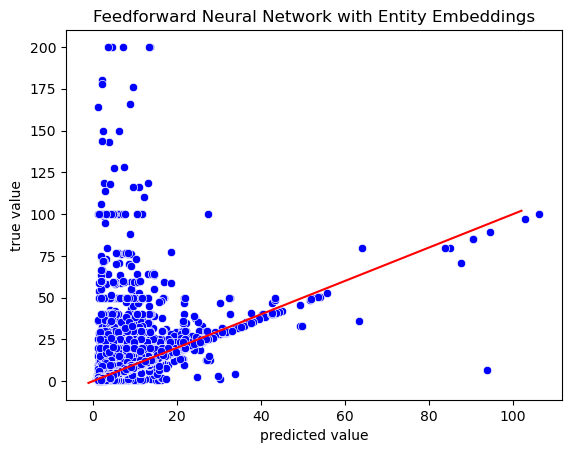

In [32]:
errors = sns.scatterplot(data = error_df, x = 'NNEE_predicted', y = 'NNEE_true', color = 'b')
plt.plot([-1, 102], [-1, 102], c = 'r')
plt.title('Feedforward Neural Network with Entity Embeddings')
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.savefig('NNEE_errors.png')

In [27]:
error_df.to_csv('NNEE_errors.csv')

In [55]:
loss = [16.0542, 15.6691, 15.6444, 15.6170, 15.5986, 15.5946, 15.5794, 15.5614,
        15.5613, 15.5486, 15.5306, 15.5280, 15.5159, 15.4985]
val_loss = [14.0372, 14.0726, 14.2342, 14.0455, 14.2637, 14.0162, 14.0698, 
            14.0648, 14.0084, 14.0435, 14.0787, 14.0673, 14.0475, 14.1426]

loss = [sqrt(x) for x in loss]
val_loss = [sqrt(x) for x in val_loss]

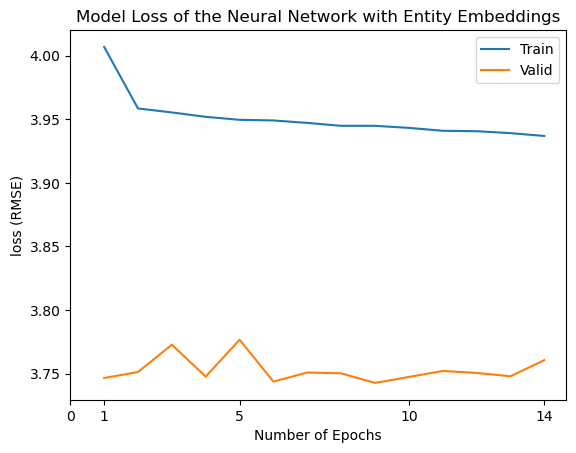

In [60]:
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss of the Neural Network with Entity Embeddings')
plt.ylabel('loss (RMSE)')
plt.xlabel('Number of Epochs')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.xticks([-1, 0, 4, 9, 13], [0, 1, 5, 10, 14])
plt.savefig('ModelLossNN.png')
plt.show()

In [61]:
# getting weights of embedding layers
country_embeddings = pd.DataFrame(mod.get_layer('country_emb').get_weights()[0]).reset_index()
currency_embeddings = pd.DataFrame(mod.get_layer('cur_emb').get_weights()[0]).reset_index()
genre_embeddings = pd.DataFrame(mod.get_layer('genre_emb').get_weights()[0]).reset_index()
tags_embeddings = pd.DataFrame(mod.get_layer('tags_emb').get_weights()[0]).reset_index()

In [62]:
country_embeddings

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0,0.036815,-0.146583,0.013059,0.160017,0.094472,-0.065855,-0.219900,-0.130059,0.239846,0.015173,0.018498,-0.027661,0.043364,0.014079,0.026302,0.155260,-0.072303,0.087714,0.299710,-0.272046,-0.135528,-0.066222,0.238476,-0.060645,0.368011,0.411549,0.157046,0.281138,-0.252815,0.115223,-0.197608,0.296793,-0.022697,-0.368331,0.586524,-0.084912,0.036116,-0.211426,0.196019,0.398010,-0.033693,-0.326827,0.448660,0.189742,0.150540,0.110047,0.177050,-0.124493,-0.044667,0.239952,0.120072,-0.093739,0.240527,-0.313207,0.191253,0.302840,-0.048252,0.134399,0.035284,-0.007724
1,1,-0.033017,-0.107421,-0.161269,-0.043620,0.176891,0.172575,-0.044875,0.155883,0.117939,0.055764,0.207438,-0.129534,-0.017910,-0.000201,0.024907,-0.113014,0.100203,0.111080,0.188999,-0.013984,-0.066990,-0.088803,-0.060190,0.176416,0.087473,0.074824,0.024960,0.198749,0.002477,0.182906,-0.011826,0.073310,-0.060306,-0.264419,-0.062233,0.061765,-0.084109,-0.024699,0.163777,0.143881,0.023801,-0.360105,0.106641,-0.170001,-0.132923,0.013378,-0.242836,0.031941,0.066090,-0.174442,0.160900,-0.009559,-0.018670,0.087146,-0.086863,0.006137,-0.102999,-0.142736,0.072725,0.071014
2,2,0.098126,0.098296,0.041117,-0.024901,0.133767,0.030744,0.133899,-0.233041,0.524748,0.140990,-0.145841,0.086745,0.123686,0.092059,0.236054,0.066176,0.002939,-0.153094,0.025815,0.050716,0.126943,-0.162939,-0.149468,-0.031694,0.126050,0.649380,0.104743,0.826875,0.003465,-0.125776,0.061118,0.006513,0.220838,-0.323319,0.418175,-0.505478,-0.130442,-0.104504,-0.298737,0.271561,-0.010386,0.051853,-0.003864,0.091261,0.048889,-0.152624,-0.356377,-0.133874,-0.159500,-0.012800,-0.233075,-0.127270,0.447374,-0.361184,0.070280,0.037759,0.113983,0.068577,-0.162694,0.088105
3,3,-0.098763,0.042341,-0.045503,-0.228672,-0.050053,0.158757,0.026246,0.066835,0.145254,0.017759,-0.037678,-0.078992,-0.028730,-0.101362,0.162201,-0.044129,0.063967,0.008218,0.084445,-0.059579,-0.104813,-0.073782,-0.153255,-0.035815,-0.024595,-0.113930,0.053369,0.043513,0.019053,0.119564,0.019428,-0.032088,0.095270,0.059301,0.146349,-0.069081,0.042529,-0.158595,-0.074782,-0.026778,-0.079010,0.039111,0.049614,-0.074253,0.050749,-0.027826,-0.067746,0.060734,0.133215,-0.123571,-0.225980,-0.028687,-0.038262,-0.042230,-0.059945,0.144215,-0.059955,-0.083152,-0.041666,0.108421
4,4,-0.056267,0.182113,0.036884,-0.012306,-0.017841,-0.117182,0.030379,0.029145,0.032475,0.133072,-0.182057,0.033309,0.056307,0.079716,0.124576,0.182726,0.064864,-0.133705,-0.109943,-0.021543,-0.118414,0.110780,0.114309,0.058122,0.023303,0.096992,0.004524,-0.034296,0.143278,0.037276,-0.007525,0.043174,-0.008784,0.061209,-0.001546,-0.227168,0.005747,0.083406,-0.094530,-0.049747,-0.139863,0.033793,-0.018556,0.004474,0.001691,-0.123316,-0.068814,-0.028465,0.066017,0.082523,0.036351,-0.000122,-0.022892,-0.214249,-0.064184,-0.097415,0.019162,0.111725,0.050969,0.066133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,123,-0.226821,0.027284,-0.058257,-0.108318,0.292107,-0.276385,0.205198,-0.172901,0.039235,0.216055,0.047312,0.059196,0.187386,-0.045472,-0.076997,-0.027738,-0.010874,0.059905,0.207992,-0.111149,0.120988,-0.206955,0.054495,0.022112,-0.109282,0.268862,-0.028858,0.332365,-0.070070,0.210718,-0.040327,-0.105758,-0.203963,-0.079038,-0.186699,-0.051518,0.059690,-0.094546,0.023715,0.098115,-0.031461,-0.008852,0.077836,-0.011388,-0.201129,0.192574,0.062998,-0.014876,0.041929,-0.065272,-0.041588,0.103768,0.119493,0.096065,0.068199,0.183431,0.187289,-0.022910,0.028515,0.112394
124,124,0.049250,0.333739,-0.229880,0.348066,-0.054614,-0.213980,0.093925,-0.152264,-0.027689,0.193684,-0.229671,0.389848,0.176666,0.131219,0

In [66]:
#country: rename column names
col_names = country_embeddings.columns

new_col_names = []
for x in range(0, len(col_names)):
    name = col_names[x]
    name = str(name) + 'country'
    new_col_names.append(name)

country_embeddings = country_embeddings.set_axis(new_col_names, axis = 1)

In [67]:
#currency: rename column names
col_names = currency_embeddings.columns

new_col_names = []
for x in range(0, len(col_names)):
    name = col_names[x]
    name = str(name) + 'currency'
    new_col_names.append(name)

currency_embeddings = currency_embeddings.set_axis(new_col_names, axis = 1)

In [68]:
#genre: rename column names
col_names = genre_embeddings.columns

new_col_names = []
for x in range(0, len(col_names)):
    name = col_names[x]
    name = str(name) + 'genre'
    new_col_names.append(name)

genre_embeddings = genre_embeddings.set_axis(new_col_names, axis = 1)

In [69]:
#tags: rename column names
col_names = tags_embeddings.columns

new_col_names = []
for x in range(0, len(col_names)):
    name = col_names[x]
    name = str(name) + 'tags'
    new_col_names.append(name)

tags_embeddings = tags_embeddings.set_axis(new_col_names, axis = 1)

In [70]:
country_embeddings.to_csv('country_embeddings.csv')
currency_embeddings.to_csv('currency_embeddings.csv')
genre_embeddings.to_csv('genre_embeddings.csv')
tags_embeddings.to_csv('tags_embeddings.csv')